In [1]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
df= pd.read_csv("weekly_sales_dataset.csv")

In [5]:
df.head()

,Advertising_Spend,Price,Competitor_Price,Weekly_Sales
0,559.61,43.37,57.30,1191.85
1,483.41,45.52,45.54,750.17
2,577.72,55.98,58.09,938.41
3,682.76,54.88,61.49,1360.39
4,471.90,49.83,54.89,839.55


In [6]:
df.columns

Index(['Advertising_Spend', 'Price', 'Competitor_Price', 'Weekly_Sales'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Advertising_Spend  300 non-null    float64
 1   Price              300 non-null    float64
 2   Competitor_Price   300 non-null    float64
 3   Weekly_Sales       300 non-null    float64
dtypes: float64(4)
memory usage: 9.5 KB


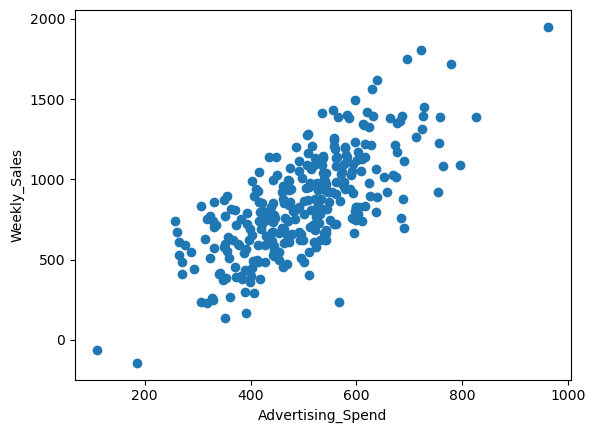

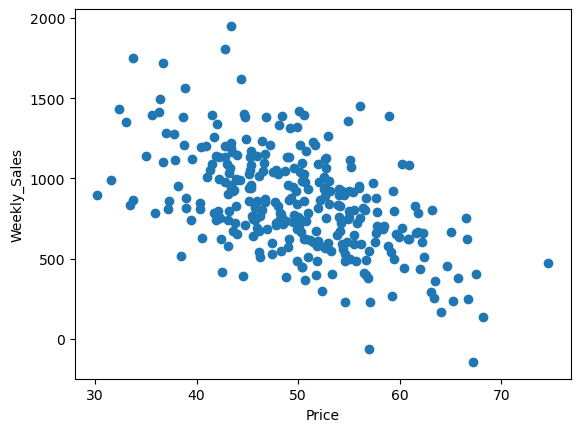

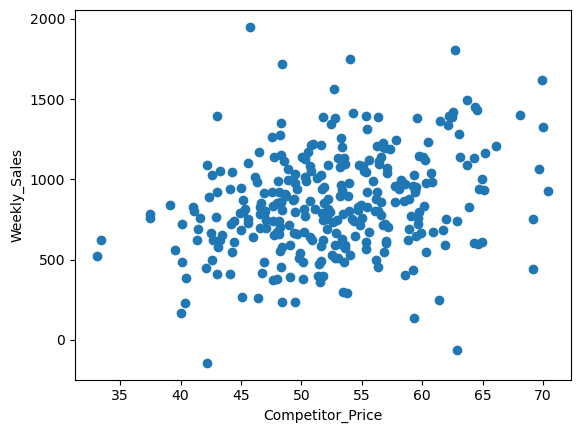

In [8]:
import matplotlib.pyplot as plt

features = ["Advertising_Spend", "Price", "Competitor_Price"]

for col in features:
    plt.scatter(df[col], df["Weekly_Sales"])
    plt.xlabel(col)
    plt.ylabel("Weekly_Sales")
    plt.show()


In [9]:
X = df[["Advertising_Spend", "Price", "Competitor_Price"]]
y = df["Weekly_Sales"]

In [10]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

ridge_model = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=1.0))
])

ridge_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge())])

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
from sklearn.linear_model import LinearRegression

mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)


LinearRegression()

In [13]:
intercept = mlr_model.intercept_
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": mlr_model.coef_
})

intercept, coefficients


(229.98048171239043,
              Feature  Coefficient
 0  Advertising_Spend     1.901454
 1              Price   -20.089307
 2   Competitor_Price    12.857481)

In [15]:
y_pred = mlr_model.predict(X_test)


In [16]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

r2, rmse, mae


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(0.8005903658927165, 119.23467253853967, 93.46242431692248)

In [17]:
# 2 model risk and couterfactual 

In [19]:
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)


LinearRegression()

In [20]:
y_pred = baseline_model.predict(X_test)


In [21]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

r2, rmse, mae


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(0.8005903658927165, 119.23467253853967, 93.46242431692248)

In [22]:

X_test_cf = X_test.copy()

X_test_cf["Advertising_Spend"] = X_test_cf["Advertising_Spend"] * 1.20


In [23]:

y_pred_baseline = baseline_model.predict(X_test)


y_pred_counterfactual = baseline_model.predict(X_test_cf)


In [24]:
import numpy as np

# Absolute impact
sales_change = y_pred_counterfactual - y_pred_baseline

# Average impact
avg_change = np.mean(sales_change)

avg_change


195.1683186157067

In [25]:
percentage_change = (avg_change / np.mean(y_pred_baseline)) * 100
percentage_change


21.38976601900999

In [27]:
import numpy as np

# Copy original test data
X_test_noisy = X_test.copy()

# Add Gaussian noise (5% of std deviation)
noise = np.random.normal(
    loc=0,
    scale=0.05 * X_test["Advertising_Spend"].std(),
    size=len(X_test)
)

X_test_noisy["Advertising_Spend"] = X_test_noisy["Advertising_Spend"] + noise


In [28]:
# Predictions with noisy data
y_pred_noisy = baseline_model.predict(X_test_noisy)


In [29]:
prediction_diff = y_pred_noisy - y_pred_baseline

avg_prediction_shift = np.mean(np.abs(prediction_diff))
avg_prediction_shift


6.403859662339755

In [30]:
from sklearn.metrics import r2_score, mean_squared_error

r2_noisy = r2_score(y_test, y_pred_noisy)
rmse_noisy = mean_squared_error(y_test, y_pred_noisy, squared=False)

r2_noisy, rmse_noisy


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(0.8079952831647748, 116.9998874348811)

In [31]:

ad_spend = np.linspace(0, 100, 50)

# Sales with diminishing returns (log curve)
sales = 50 * np.log(ad_spend + 1)

df_sat = pd.DataFrame({
    "Advertising_Spend": ad_spend,
    "Weekly_Sales": sales
})


In [32]:
from sklearn.linear_model import LinearRegression

X = df_sat[["Advertising_Spend"]]
y = df_sat["Weekly_Sales"]

lin_model = LinearRegression()
lin_model.fit(X, y)

y_pred_linear = lin_model.predict(X)


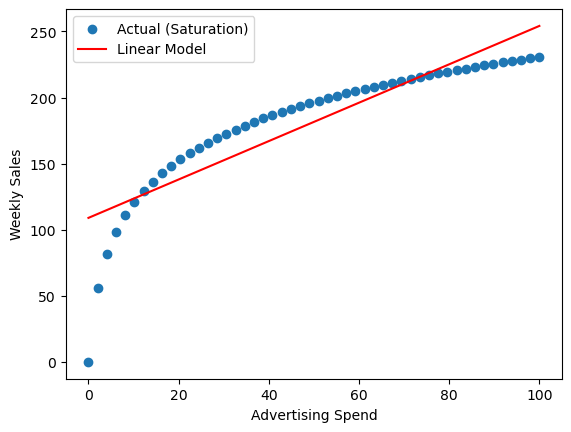

In [33]:
import matplotlib.pyplot as plt

plt.scatter(ad_spend, sales, label="Actual (Saturation)")
plt.plot(ad_spend, y_pred_linear, color="red", label="Linear Model")
plt.xlabel("Advertising Spend")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
df = pd.read_csv("weekly_sales_dataset.csv")

X = df.drop("Weekly_Sales", axis=1)   # features
y = df["Weekly_Sales"]                # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [38]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [39]:
train_pred = tree.predict(X_train)
test_pred = tree.predict(X_test)

print("Train R²:", r2_score(y_train, train_pred))
print("Test R² :", r2_score(y_test, test_pred))


Train R²: 1.0
Test R² : 0.2992213351147306


In [ ]:
#robustness

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

train_pred = tree.predict(X_train)
test_pred = tree.predict(X_test)

print("Train R²:", r2_score(y_train, train_pred))
print("Test R² :", r2_score(y_test, test_pred))


Train R²: 1.0
Test R² : 0.2992213351147306


In [41]:
tree_tuned = DecisionTreeRegressor(
    max_depth=4,          # 🔑 tuned hyperparameter
    random_state=42
)

tree_tuned.fit(X_train, y_train)

print("Train R² (tuned):", r2_score(y_train, tree_tuned.predict(X_train)))
print("Test  R² (tuned):", r2_score(y_test, tree_tuned.predict(X_test)))


Train R² (tuned): 0.8169993491397474
Test  R² (tuned): 0.537148987488306


In [42]:
from sklearn.utils import resample

# remove 10% of rows randomly
df_perturbed = resample(
    df,
    replace=False,
    n_samples=int(0.9 * len(df)),
    random_state=42
)

X_p = df_perturbed.drop("Weekly_Sales", axis=1)
y_p = df_perturbed["Weekly_Sales"]


In [43]:
tree_perturbed = DecisionTreeRegressor(
    max_depth=4,
    random_state=42
)

tree_perturbed.fit(X_p, y_p)


DecisionTreeRegressor(max_depth=4, random_state=42)

In [44]:
import numpy as np

# predictions from original tuned model
pred_original = tree_tuned.predict(X_test)

# predictions from perturbed-data model
pred_perturbed = tree_perturbed.predict(X_test)

# average absolute difference
diff = np.mean(np.abs(pred_original - pred_perturbed))

print("Average absolute prediction difference:", diff)


Average absolute prediction difference: 56.40997978308296


In [45]:
#This suggests that the tuned model is reasonably stable but still exhibits some variance, which is inherent to non-parametric models such as decision trees.

In [ ]:
# again traing LR

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

# predictions
lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

print("LR Train R²:", r2_score(y_train, lr_train_pred))
print("LR Test  R²:", r2_score(y_test, lr_test_pred))


LR Train R²: 0.8566015989439704
LR Test  R²: 0.8005903658927165


In [48]:
from sklearn.utils import resample

df_perturbed = resample(
    df,
    replace=False,
    n_samples=int(0.9 * len(df)),
    random_state=42
)

X_p = df_perturbed.drop("Weekly_Sales", axis=1)
y_p = df_perturbed["Weekly_Sales"]



In [49]:
# Decision Tree retrained
tree_p = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_p.fit(X_p, y_p)

# Linear Regression retrained
lr_p = LinearRegression()
lr_p.fit(X_p, y_p)


LinearRegression()

In [50]:
import numpy as np

# Tree predictions
tree_pred_orig = tree.predict(X_test)
tree_pred_pert = tree_p.predict(X_test)

tree_diff = np.mean(np.abs(tree_pred_orig - tree_pred_pert))

# Linear Regression predictions
lr_pred_orig = lr.predict(X_test)
lr_pred_pert = lr_p.predict(X_test)

lr_diff = np.mean(np.abs(lr_pred_orig - lr_pred_pert))

print("Decision Tree avg prediction change:", tree_diff)
print("Linear Regression avg prediction change:", lr_diff)


Decision Tree avg prediction change: 139.00955044109563
Linear Regression avg prediction change: 8.105728897178425


In [52]:
lr.coef_
lr.intercept_


229.98048171239043

In [53]:
tree_tuned.get_depth()
tree_tuned.get_n_leaves()
tree_tuned.feature_importances_


array([0.6553719 , 0.30225527, 0.04237283])

In [ ]:
#deployment

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

lr_prod = LinearRegression()
lr_prod.fit(X_train, y_train)

train_pred = lr_prod.predict(X_train)
test_pred = lr_prod.predict(X_test)

print("Train R²:", r2_score(y_train, train_pred))
print("Test R² :", r2_score(y_test, test_pred))
print("Test MAE:", mean_absolute_error(y_test, test_pred))


Train R²: 0.8566015989439704
Test R² : 0.8005903658927165
Test MAE: 93.46242431692248


In [57]:
import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

pred_variability = []

for train_idx, test_idx in kf.split(X):
    X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
    y_tr = y.iloc[train_idx]

    lr = LinearRegression()
    lr.fit(X_tr, y_tr)

    pred_variability.append(np.mean(lr.predict(X_te)))

print("Prediction variability (mean across folds):", np.std(pred_variability))


Prediction variability (mean across folds): 32.38202446152817


In [59]:
import pandas as pd

coef_table = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr_prod.coef_
})

coef_table


,Feature,Coefficient
0,Advertising_Spend,1.901454
1,Price,-20.089307
2,Competitor_Price,12.857481


In [61]:
from sklearn.tree import DecisionTreeRegressor

tree_risk = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_risk.fit(X_train, y_train)

tree_pred = tree_risk.predict(X_test)

print("Decision Tree Test R²:", r2_score(y_test, tree_pred))


Decision Tree Test R²: 0.537148987488306


In [62]:
print("Tree depth:", tree_risk.get_depth())
print("Tree leaves:", tree_risk.get_n_leaves())


Tree depth: 4
Tree leaves: 16
